In [4]:
# Libraries
import numpy as np
import pandas as pd
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [5]:
# 1. Pengumpulan Data
dir = 'hungarian.data'
with open(dir, encoding='Latin1') as file:
  lines = [line.strip() for line in file]

lines[0:10]

['1254 0 40 1 1 0 0',
 '-9 2 140 0 289 -9 -9 -9',
 '0 -9 -9 0 12 16 84 0',
 '0 0 0 0 150 18 -9 7',
 '172 86 200 110 140 86 0 0',
 '0 -9 26 20 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 -9 -9 12',
 '20 84 0 -9 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 1 1 1',
 '1 1 -9. -9. name']

In [6]:
# 2. Menelaah Data
data = itertools.takewhile(
    lambda x: len(x) == 76,
    (' '.join(lines[i:(i + 10)]).split() for
     i in range (0, len(lines), 10))
)
df = pd.DataFrame.from_records(data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,1254,0,40,1,1,0,0,-9,2,140,...,-9,-9,1,1,1,1,1,-9.,-9.,name
1,1255,0,49,0,1,0,0,-9,3,160,...,-9,-9,1,1,1,1,1,-9.,-9.,name
2,1256,0,37,1,1,0,0,-9,2,130,...,-9,-9,1,1,1,1,1,-9.,-9.,name
3,1257,0,48,0,1,1,1,-9,4,138,...,2,-9,1,1,1,1,1,-9.,-9.,name
4,1258,0,54,1,1,0,1,-9,3,150,...,1,-9,1,1,1,1,1,-9.,-9.,name


In [7]:
# Cek info setiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 76 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       294 non-null    object
 1   1       294 non-null    object
 2   2       294 non-null    object
 3   3       294 non-null    object
 4   4       294 non-null    object
 5   5       294 non-null    object
 6   6       294 non-null    object
 7   7       294 non-null    object
 8   8       294 non-null    object
 9   9       294 non-null    object
 10  10      294 non-null    object
 11  11      294 non-null    object
 12  12      294 non-null    object
 13  13      294 non-null    object
 14  14      294 non-null    object
 15  15      294 non-null    object
 16  16      294 non-null    object
 17  17      294 non-null    object
 18  18      294 non-null    object
 19  19      294 non-null    object
 20  20      294 non-null    object
 21  21      294 non-null    object
 22  22      294 non-null    ob

In [8]:
df = df.iloc[:,:-1]
df = df.drop(df.columns[0], axis=1)

In [9]:
df = df.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       294 non-null    float64
 1   2       294 non-null    float64
 2   3       294 non-null    float64
 3   4       294 non-null    float64
 4   5       294 non-null    float64
 5   6       294 non-null    float64
 6   7       294 non-null    float64
 7   8       294 non-null    float64
 8   9       294 non-null    float64
 9   10      294 non-null    float64
 10  11      294 non-null    float64
 11  12      294 non-null    float64
 12  13      294 non-null    float64
 13  14      294 non-null    float64
 14  15      294 non-null    float64
 15  16      294 non-null    float64
 16  17      294 non-null    float64
 17  18      294 non-null    float64
 18  19      294 non-null    float64
 19  20      294 non-null    float64
 20  21      294 non-null    float64
 21  22      294 non-null    float64
 22  23

In [10]:
# 3. Validasi Data
df.replace(-9.0, np.nan, inplace=True)
df.head()

,1,2,3,4,5,6,7,8,9,10,...,65,66,67,68,69,70,71,72,73,74
0,0.0,40.0,1.0,1.0,0.0,0.0,NaN,2.0,140.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
1,0.0,49.0,0.0,1.0,0.0,0.0,NaN,3.0,160.0,1.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
2,0.0,37.0,1.0,1.0,0.0,0.0,NaN,2.0,130.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
3,0.0,48.0,0.0,1.0,1.0,1.0,NaN,4.0,138.0,0.0,...,NaN,2.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
4,0.0,54.0,1.0,1.0,0.0,1.0,NaN,3.0,150.0,0.0,...,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN


In [11]:
# 4. Menentukan Objek Data (ambil 14 fitur)
kolom_ygdipilih = [2, 3, 8, 9, 11, 15, 18, 31, 37, 39, 40, 43, 50, 57]
objek_data = df[kolom_ygdipilih]
objek_data.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restceg', 'thalach', 'exang', 'odpeak', 'slope', 'ca', 'thal', 'target']
objek_data = objek_data.astype(float)
objek_data.head()

,age,sex,cp,trestbps,chol,fbs,restceg,thalach,exang,odpeak,slope,ca,thal,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,NaN,NaN,NaN,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,NaN,NaN,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,NaN,NaN,NaN,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,NaN,NaN,3.0
4,54.0,1.0,3.0,150.0,NaN,0.0,0.0,122.0,0.0,0.0,NaN,NaN,NaN,0.0


In [12]:
objek_data.value_counts()

age   sex  cp   trestbps  chol   fbs  restceg  thalach  exang  odpeak  slope  ca   thal  target
47.0  1.0  4.0  150.0     226.0  0.0  0.0      98.0     1.0    1.5     2.0    0.0  7.0   1.0       1
Name: count, dtype: int64

In [13]:
print(objek_data.isnull().sum())

age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restceg       1
thalach       1
exang         1
odpeak        0
slope       190
ca          290
thal        266
target        0
dtype: int64


In [14]:
objek_data.drop(columns=['slope','ca','thal'],inplace=True)

In [15]:
# 5. Membersihkan dataset

# Cek duplikat
duplicate_rows = objek_data[objek_data.duplicated()]
print("Jumlah baris duplikat:", len(duplicate_rows))
print(duplicate_rows)

Jumlah baris duplikat: 1
      age  sex   cp  trestbps  chol  fbs  restceg  thalach  exang  odpeak  \
163  49.0  0.0  2.0     110.0   NaN  0.0      0.0    160.0    0.0     0.0   

     target  
163     0.0  


In [16]:
nilai_duplikat = objek_data.drop_duplicates(inplace=True)
print(nilai_duplikat)

None


In [17]:
imputer = SimpleImputer(strategy='mean')
objek_data = pd.DataFrame(imputer.fit_transform(objek_data), columns=objek_data.columns)

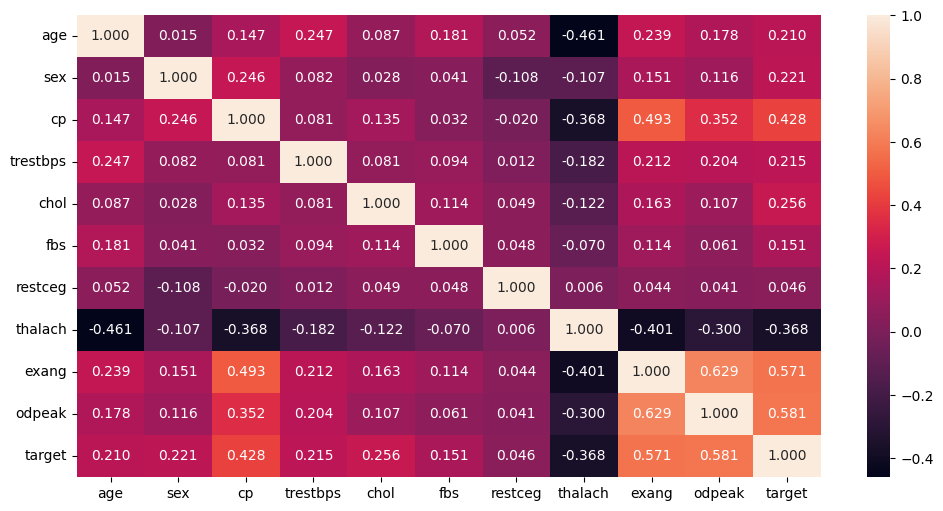

In [19]:
plt.figure(figsize=(12,6))
sns.heatmap(objek_data.corr(), annot=True, cmap='rocket', fmt='.3f')
plt.show()

In [20]:
print(objek_data.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restceg', 'thalach',
       'exang', 'odpeak', 'target'],
      dtype='object')


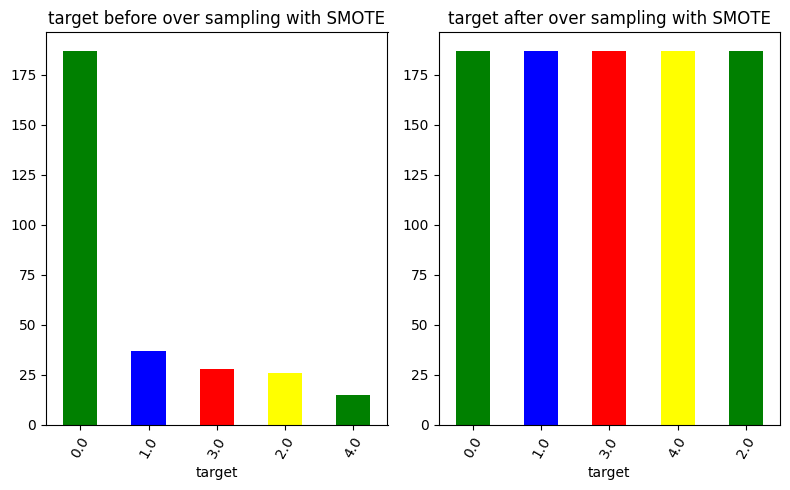

In [35]:
from imblearn.over_sampling import SMOTE

# 6. Konstruksi Data
X = objek_data.drop('target', axis=1)
y = objek_data['target']

plt.figure(figsize=(8, 5))

colors = ['green', 'blue', 'red', 'yellow', 'green']

# Bar plot sebelum over sampling with SMOTE
plt.subplot(1, 2, 1)
objek_data['target'].value_counts().plot(kind='bar', color=colors)
plt.title('target before over sampling with SMOTE')
plt.xlabel('target')
plt.xticks(rotation=60)

# Oversampling SMOTE
oversample = SMOTE()
Xos, yos = oversample.fit_resample(X, y)

# Bar plot setelah  over sampling with SMOTE
plt.subplot(1, 2, 2)
pd.Series(yos).value_counts().plot(kind='bar', color=colors)
plt.title('target after over sampling with SMOTE')
plt.xlabel('target')
plt.xticks(rotation=60)

# menampilkan plot
plt.tight_layout()
plt.show()

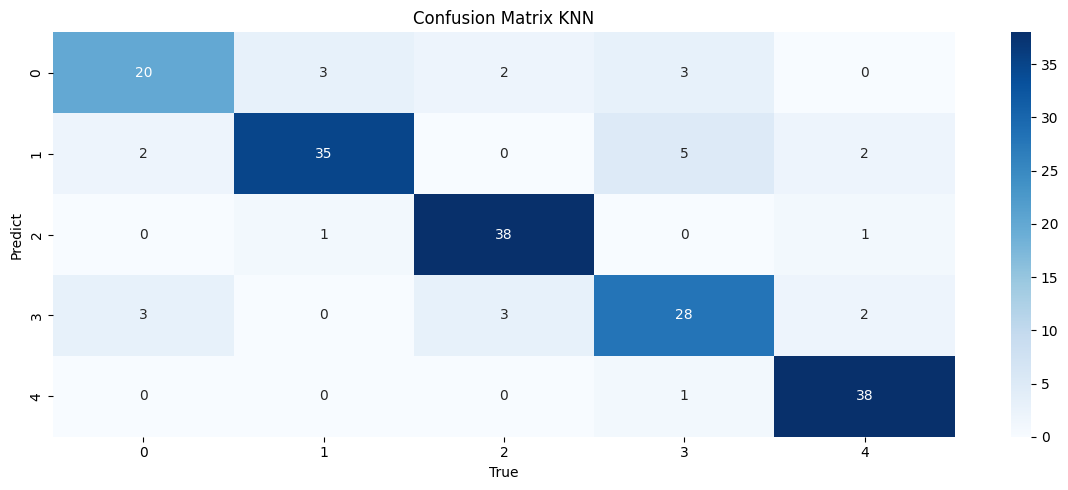

Akurasi KNN: 85.03%


In [74]:
# 7. Pemodelan 3 Algoritma

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Pemdelan KNN
# Split data menjadi training dan testing sets
X_train, X_test, y_train, y_test = train_test_split(Xos, yos, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)

# standarkan data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# train data
knn.fit(X_train_scaled, y_train)

# Prediksi pada testing set
y_predict_knn = knn.predict(X_test_scaled)
akurasi_knn = accuracy_score(y_test, y_predict_knn)

# Membuat confusion matrix
matrix_knn = confusion_matrix(y_test, y_predict_knn)

# Menampilkan confusion matrix
plt.figure(figsize=(12,5))
sns.heatmap(matrix_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix KNN')
plt.xlabel('True')
plt.ylabel('Predict')
plt.tight_layout()
plt.show()
print("Akurasi KNN: {:.2f}%".format(akurasi_knn * 100))

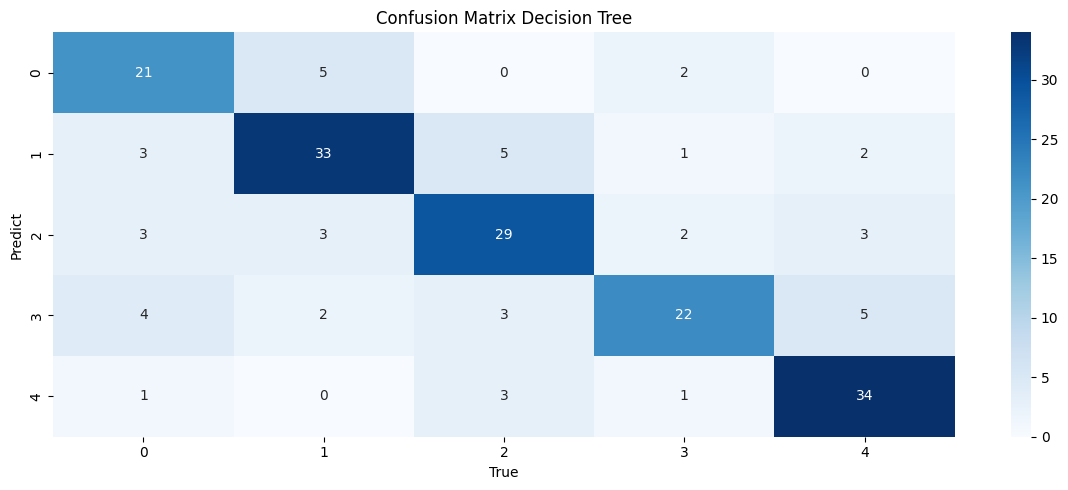

Akurasi Decision Tree: 74.33%


In [75]:
# Pemodelan Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train)
y_predict_dt = dt.predict(X_test_scaled)
akurasi_dt = accuracy_score(y_test, y_predict_dt)
matrix_dt = confusion_matrix(y_test, y_predict_dt)

# Menampilkan confusion matrix
plt.figure(figsize=(12,5))
sns.heatmap(matrix_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Decision Tree')
plt.xlabel('True')
plt.ylabel('Predict')
plt.tight_layout()
plt.show()
print("Akurasi Decision Tree: {:.2f}%".format(akurasi_dt * 100))

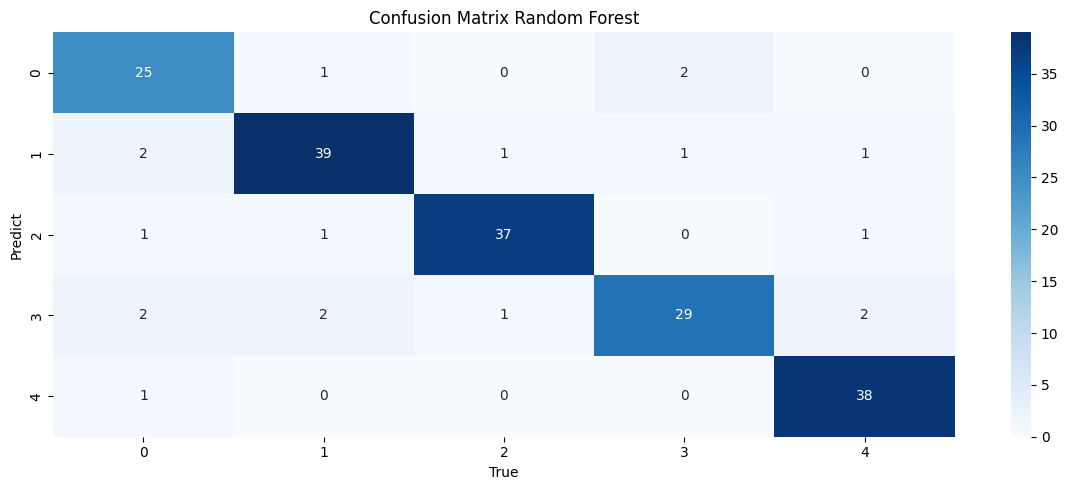

Akurasi Random Forest: 89.84%


In [78]:
# Pemodelan Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_predict_rf = rf.predict(X_test_scaled)
akurasi_rf = accuracy_score(y_test, y_predict_rf)
matrix_rf = confusion_matrix(y_test, y_predict_rf)

# Menampilkan confusion matrix
plt.figure(figsize=(12,5))
sns.heatmap(matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Random Forest')
plt.xlabel('True')
plt.ylabel('Predict')
plt.tight_layout()
plt.show()
print("Akurasi Random Forest: {:.2f}%".format(akurasi_rf * 100))

In [79]:
# 8. Evaluasi
print("Akurasi Random Forest: {:.2f}%".format(akurasi_rf * 100))
print("Akurasi Decision Tree: {:.2f}%".format(akurasi_dt * 100))
print("Akurasi KNN: {:.2f}%".format(akurasi_knn * 100))

Akurasi Random Forest: 89.84%
Akurasi Decision Tree: 74.33%
Akurasi KNN: 85.03%


10. Kesimpulan
  
  Dari hasil yang diperoleh, Random Forest adalah model terbaik untuk klasifikasi penyakit jantung dalam proyek ini, dengan akurasi tertinggi dan performa yang lebih stabil. KNN juga memberikan hasil yang cukup baik dan bisa menjadi alternatif yang solid, terutama jika interpretabilitas dan kesederhanaan implementasi menjadi pertimbangan utama. Decision Tree, meskipun mudah diinterpretasikan, menunjukkan performa yang paling rendah dan lebih rentan terhadap overfitting, sehingga kurang direkomendasikan dibandingkan dengan dua model lainnya.
  
  Dengan demikian, disarankan untuk menggunakan Random Forest untuk prediksi penyakit jantung pada pasien, mengingat akurasinya yang tinggi dan keandalannya dalam menangani data yang kompleks.






